### MSc Computer Science, Data Science @UniPD
### Optimization Methods for Data Science
---

# Packages

In [46]:
env = 'pc'  # 'pc', 'colab'

save_dir = f'C:/Users/79137/Pasha/2. UNIPD/Semester 2/Optimization for Data Science/Homeworks/HW 1/Semi-Supervised-Labelling/'
using_gpu = False

In [4]:
%%capture
git_download_path = 'https://raw.githubusercontent.com/PashaIanko/Semi-Supervised-Labelling/master/'

def download_files(url_dict):
    for file, url in url_dict.items():
        !wget -O {file} {url} {file}

if env == 'colab':
    from google.colab import drive
    drive.mount('/content/drive')

    files = [
           'BCGDSolver.py',
           'DataProperties.py',
           'GradientDescentSolver.py',
           'GradientSolver.py',
           'Utils.py'  
    ]

    url_dict = {file: git_download_path + file for file in files}
    download_files(url_dict)

In [5]:
from sklearn.datasets import make_blobs
import numpy as np

from sklearn import datasets
from sklearn.metrics import accuracy_score
import pandas as pd
import timeit

# Plotting
import matplotlib.pyplot as plt

In [6]:
import Utils
import GradientSolver
import GradientDescentSolver
import DataProperties
import BCGDSolver
import importlib

def reload_all(modules_list):
    for module in modules_list:
        importlib.reload(module)

reload_all(
    [
        Utils,
        GradientSolver,
        GradientDescentSolver,
        DataProperties,
        BCGDSolver
    ]
)

from Utils import *
from GradientSolver import GradientSolver
from GradientDescentSolver import GradientDescentSolver
from DataProperties import DataProperties
from BCGDSolver import BCGDSolver

# Data preparation

In [7]:
# Fix states
sklearn_random_state = 42
numpy_seed = 42

np.random.seed(numpy_seed)

Data shape: X: (1000, 2), Y: (1000,)


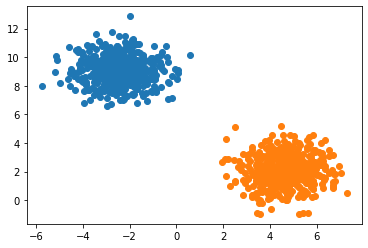

In [8]:
X, Y = make_blobs(
    n_samples = DataProperties.n_samples,
    centers = DataProperties.n_clusters,
    n_features = DataProperties.n_dims,
    random_state = sklearn_random_state
)

def euclidian_similarity(Xi, Xj):
    return 1 / (norm(Xi - Xj) + 0.001)

weights = calc_weight_matrix(X, weight_func = euclidian_similarity)


Y = Y.astype('float64')
clusters = np.unique(Y)

print(f'Data shape: X: {X.shape}, Y: {Y.shape}')
plot_clusters(X, Y)

## Unlabel subset and visualize

Found 500 instances of object 0.0
We have to delabel 475 instances
Found 500 instances of object 1.0
We have to delabel 475 instances

    We have 950 unlabeled data
    Out of 1000
    


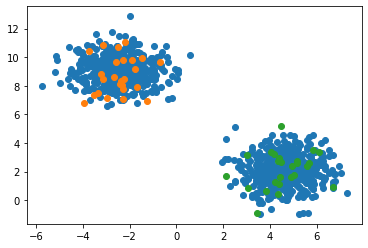

In [10]:
Y_delabeled = delabel_data(
    Y,
    labeled_percent = DataProperties.labeled_percentage,
    delabel_value = DataProperties.unlabeled
)

print(
    f'''
    We have {len(Y_delabeled[Y_delabeled == DataProperties.unlabeled])} unlabeled data
    Out of {len(Y_delabeled)}
    '''
)

plot_clusters(X, Y_delabeled)

- Up to now, we have the clustered data, saved correct labelling (Y) and delabelled data (Y_delabelled)
- For the unlabelled y variables, the loss function depends on the (y_1, ..., y_U) unlabeled parameters. Each of the
parameters is independent on others, and can be 0 or 1 (for **binary clustering problem**). This is why we will be searching
for **optimal solution in the R^(U)** space, which yields minimum to the **loss function**

In [11]:
import collections
class_stats = collections.Counter(Y_delabeled)
assert(len(class_stats.keys()) == 3)  # 2 labeled classes and 1 unlabeled

# Gradient descent

In [12]:
# solver = GradientDescentSolver(
#     similarity_func = None, # euclidian_similarity,
#     lr_strategy = 'lr_constant',  # search for alpha_k
#     learning_rate = 0.001
# )

In [13]:
# X.shape

In [14]:
# Y_preds_GD = solver.solve(
#     X, 
#     Y_delabeled, 
#     iter_limit = 10, 
#     delta_loss_limit = 0.008, 
#     stop_loss = 2198,
#     weight_matrix = weights
# )

In [15]:
# plot_clusters(X, Y)
# plot_clusters(X, Y_preds_GD)
# print(f'Accuracy: {accuracy_score(Y, Y_preds_GD)}')

In [16]:
# plt.plot(solver.losses, marker = 'o')
# plt.grid()

# Block coordinates gradient descent (randomized)

## BCGD random permutations

In [17]:
# random_solver = BCGDSolver(
#     lr_strategy = 'lr_constant',
#     learning_rate = 0.001,
#     similarity_func = None,

#     bcgd_strategy = 'random permutation',
# )

In [18]:
# Y_preds_BCGD_permutation = random_solver.solve(
#     X, 
#     Y_delabeled, 
#     iter_limit = 10, 
#     delta_loss_limit = 0.008, 
#     stop_loss= 2174,
#     weight_matrix = weights
# )

In [19]:
# plot_clusters(X, Y)
# plot_clusters(X, Y_preds_BCGD_permutation)
# print(f'Accuracy: {accuracy_score(Y, Y_preds_BCGD_permutation)}')

In [20]:
# plt.plot(random_solver.losses, marker = 'o')
# plt.grid()

## BCGD random sampling

In [ ]:
# BCGD_RS_solver = BCGDSolver(
#     lr_strategy = 'lr_constant',
#     learning_rate = 0.00015,
#     similarity_func = None,

#     bcgd_strategy = 'random sampling'
# )

In [ ]:
# Y_preds_BCGD_sampling = BCGD_RS_solver.solve(
#     X = X, 
#     Y = Y_delabeled, 
#     iter_limit = 100,
#     delta_loss_limit = 0.0,
#     stop_loss= 2380,
#     weight_matrix = weights
# )

Iteration: 0, Loss: 5852.532638240798, Delta: 5852.532638240798
Iteration: 1, Loss: 5852.486462445505, Delta: 0.04617579529349314
Iteration: 2, Loss: 5852.382709959946, Delta: 0.10375248555919825
Iteration: 3, Loss: 5852.376437273661, Delta: 0.006272686284319207
Iteration: 4, Loss: 5852.341537981054, Delta: 0.034899292607406096
Iteration: 5, Loss: 5852.328438924664, Delta: 0.0130990563902742
Iteration: 6, Loss: 5852.316576880985, Delta: 0.01186204367877508
Iteration: 7, Loss: 5852.30616089726, Delta: 0.010415983724669786
Iteration: 8, Loss: 5852.286311036492, Delta: 0.019849860767862992
Iteration: 9, Loss: 5852.24399751776, Delta: 0.04231351873204403
Iteration: 10, Loss: 5852.220699238321, Delta: 0.023298279439586622
Iteration: 11, Loss: 5852.19075331712, Delta: 0.029945921201033343
Iteration: 12, Loss: 5852.127049051644, Delta: 0.0637042654761899
Iteration: 13, Loss: 5852.090752881695, Delta: 0.03629616994840035
Iteration: 14, Loss: 5852.066453961306, Delta: 0.024298920388901024
Itera

Accuracy: 0.571


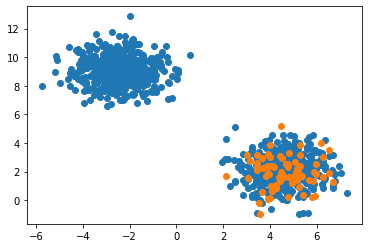

In [ ]:
# plot_clusters(
#     X, Y_preds_BCGD_sampling
# )
# print(f'Accuracy: {accuracy_score(Y, Y_preds_BCGD_sampling)}')

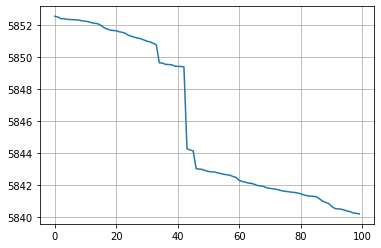

In [ ]:
# plt.plot(BCGD_RS_solver.losses)
# plt.grid()

## BCGD cyclic

In [ ]:
# BCGD_cyclic_solver = BCGDSolver(
#     lr_strategy = 'lr_constant',
#     learning_rate = 0.001,
#     similarity_func = None,

#     bcgd_strategy = 'cyclic'
# )

In [ ]:
# Y_preds_BCGD_cyclic = BCGD_cyclic_solver.solve(
#     X,
#     Y_delabeled, 
#     iter_limit = 10, 
#     delta_loss_limit = 0.0001,
#     stop_loss = 2300,
#     weight_matrix = weights
# )

Iteration: 0, Loss: 5852.532638240798, Delta: 5852.532638240798
Iteration: 1, Loss: 5383.38169306933, Delta: 469.15094517146827
Iteration: 2, Loss: 5160.130641867445, Delta: 223.25105120188528
Iteration: 3, Loss: 5085.495608265532, Delta: 74.63503360191316
Iteration: 4, Loss: 5057.8065144248185, Delta: 27.689093840713213
Iteration: 5, Loss: 5046.753284600918, Delta: 11.053229823900438
Iteration: 6, Loss: 5042.112902764877, Delta: 4.6403818360413425
Iteration: 7, Loss: 5039.927860435394, Delta: 2.1850423294827124
Iteration: 8, Loss: 5038.7765365994255, Delta: 1.1513238359684692
Iteration: 9, Loss: 5038.065369794376, Delta: 0.7111668050492881


Accuracy: 1.0


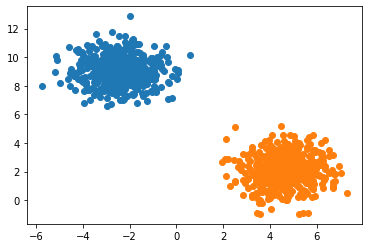

In [ ]:
# print(f'Accuracy: {accuracy_score(Y_preds_BCGD_cyclic, Y)}')
# plot_clusters(
#     X, Y_preds_BCGD_cyclic
# )

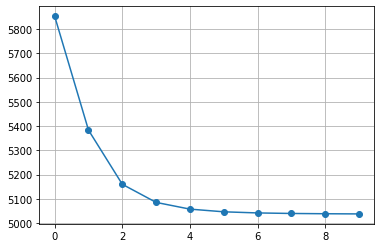

In [ ]:
# plt.plot(BCGD_cyclic_solver.losses, marker = 'o')
# plt.grid()

# Model comparison

We will compare models based on:
- Clustering metrics
- CPU time
- Number of iterations
- Loss curves
- Distance metrics

In [21]:
learning_rate_strategy = 'lr_constant'
simil_func = None  # No feature yet
lr = 0.001

gd_solver = GradientDescentSolver(
    similarity_func = simil_func,
    lr_strategy = learning_rate_strategy,
    learning_rate = lr
)

bcgd_permut_solver = BCGDSolver(
    lr_strategy = learning_rate_strategy,
    learning_rate = lr,
    similarity_func = simil_func,
    bcgd_strategy = 'random permutation',
)

bcgd_sampling_solver = BCGDSolver(
    lr_strategy = learning_rate_strategy,
    learning_rate = lr,
    similarity_func = simil_func,
    bcgd_strategy = 'random sampling',
)

bcgd_cyclic_solver = BCGDSolver(
    lr_strategy = learning_rate_strategy,
    learning_rate = lr,
    similarity_func = simil_func,
    bcgd_strategy = 'cyclic',
)

In [22]:
solvers = {
    'GD': gd_solver,
    'BCGD permutation': bcgd_permut_solver,
    'BCGD cyclic': bcgd_cyclic_solver,
    'BCGD sampling': bcgd_sampling_solver,
}

In [23]:
def compare_models(solvers_dict, X, Y_delabeled, iters_limit, delta_loss_limit, stop_loss, weights_matrix):
    predictions = {k:None for k in solvers_dict.keys()}
    losses = {k:None for k in solvers_dict.keys()}
    n_iterations = {k:None for k in solvers_dict.keys()}
    cpu_times = {k:None for k in solvers_dict.keys()}

    for model_name, model in solvers_dict.items():
        start = timeit.default_timer()
        Y_preds = model.solve(
            X,
            Y_delabeled,
            iter_limit = iters_limit,
            delta_loss_limit = delta_loss_limit,
            stop_loss= stop_loss,
            weight_matrix = weights_matrix
        )
        end = timeit.default_timer()
        predictions[model_name] = Y_preds
        losses[model_name] = model.losses
        n_iterations[model_name] = model.n_iterations
        cpu_times[model_name] = end - start
    

    return predictions, losses, n_iterations, cpu_times

In [24]:
iters_limit = 15
delta_loss_limit = 0.0001
stop_loss= 4000

if using_gpu:
    import tensorflow as tf
    device_name = tf.test.gpu_device_name()

    with tf.device(device_name):
        print(f'with GPU')
        preds, losses, n_iters, cpu_times = compare_models(
            solvers,
            X,
            Y_delabeled,
            iters_limit = iters_limit,
            delta_loss_limit = delta_loss_limit,
            stop_loss= stop_loss,
            weights_matrix = weights
        )

else:
    print(f'without GPU')
    preds, losses, n_iters, cpu_times = compare_models(
            solvers,
            X,
            Y_delabeled,
            iters_limit = iters_limit,
            delta_loss_limit = delta_loss_limit,
            stop_loss = stop_loss,
            weights_matrix =  weights
        )

accuracies = {name: accuracy_score(preds[name], Y) for name in solvers.keys()}

without GPU
Iteration: 0, Loss: 5633.638554244613, delta loss: 5633.638554244613
Iteration: 1, Loss: 5312.9848345235705, delta loss: 320.65371972104276
Iteration: 2, Loss: 5145.148868004789, delta loss: 167.8359665187818
Iteration: 3, Loss: 5048.987818429606, delta loss: 96.16104957518291
Iteration: 4, Loss: 4993.196755455879, delta loss: 55.791062973727094
Iteration: 5, Loss: 4960.718619094387, delta loss: 32.478136361492034
Iteration: 6, Loss: 4941.788513316001, delta loss: 18.93010577838595
Iteration: 7, Loss: 4930.748410885287, delta loss: 11.040102430713887
Iteration: 8, Loss: 4924.307204435733, delta loss: 6.441206449553647
Iteration: 9, Loss: 4920.547708933079, delta loss: 3.7594955026543175
Iteration: 10, Loss: 4918.3523667699055, delta loss: 2.1953421631733363
Iteration: 11, Loss: 4917.06952534447, delta loss: 1.2828414254354357
Iteration: 12, Loss: 4916.319135530946, delta loss: 0.750389813523725
Iteration: 13, Loss: 4915.8795254755005, delta loss: 0.4396100554458826
Iteratio

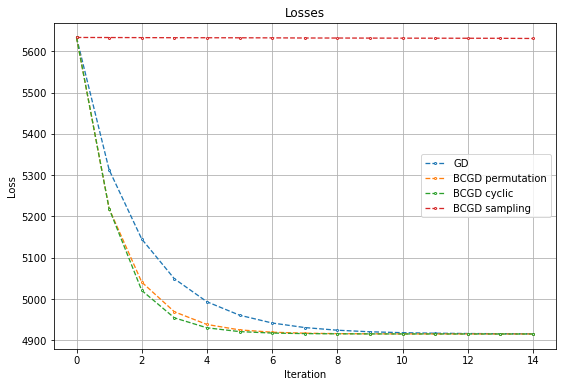

In [48]:
def plot_curves(curves_dict, title, y_label, figsize):
    _, ax = plt.subplots(figsize = figsize)

    for _, curve_res in curves_dict.items():
        ax.plot(
            curve_res,
            marker = 'o',
            linestyle = '--',
            linewidth = 1.3,
            markerfacecolor = 'white',
            markersize = 2
        )
    plt.legend(list(curves_dict.keys()))
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel(y_label)
    plt.grid()


# plot_curves({'Cyclic':losses['BCGD cyclic']}, 'Losses cyclic', y_label = 'Loss')
# plot_curves({'GD':losses['GD']}, 'Losses GD', y_label = 'Loss')
plot_curves(
    losses,
    'Losses', 
    y_label = 'Loss',
    figsize = (9, 6)
)

In [47]:
results = pd.DataFrame()

# fill losses
for model_name, loss in losses.items():
    results[f'{model_name} loss'] = loss

results.to_csv(save_dir + 'res.csv')
results.head()

,GD loss,BCGD permutation loss,BCGD cyclic loss,BCGD sampling loss
0,5633.638554,5633.638554,5633.638554,5633.638554
1,5312.984835,5218.704763,5218.709877,5633.487779
2,5145.148868,5040.765935,5020.696344,5633.256744
3,5048.987818,4969.040628,4954.325469,5633.039558
4,4993.196755,4938.214835,4930.176194,5632.955436


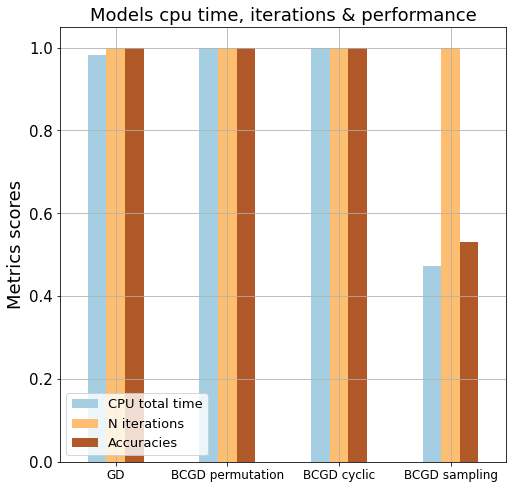

In [37]:
def plot_bar_metrics(metrics_df):
    
    ax = metrics_df.plot.bar(
        rot = 0,
        ylabel = 'Metrics results',
        cmap = 'Paired',
        figsize = (8, 8)
    )

    ax.set_title('Models cpu time, iterations & performance', fontsize = 18)
    ax.set_ylabel('Metrics scores', fontsize = 18)
    ax.tick_params(axis = 'y', labelsize = 15)
    ax.tick_params(axis = 'x', labelsize = 12)
    ax.legend(loc = 3, prop = {'size': 13})
    plt.grid()

def normalize_cols(dataframe):
    cols = dataframe.columns
    for c in cols:
        dataframe[c] = dataframe[c] / dataframe[c].max()
    

bar_metrics = pd.DataFrame.from_dict(cpu_times, orient='index', columns = ['CPU total time'])
bar_metrics['N iterations'] = n_iters.values()
bar_metrics['Accuracies'] = accuracies.values()

normalize_cols(bar_metrics)
plot_bar_metrics(bar_metrics)

In [30]:
print(accuracies)
print(n_iters)
print(cpu_times)

{'GD': 1.0, 'BCGD permutation': 1.0, 'BCGD cyclic': 1.0, 'BCGD sampling': 0.53}
{'GD': 15, 'BCGD permutation': 15, 'BCGD cyclic': 15, 'BCGD sampling': 15}
{'GD': 30.158328100000062, 'BCGD permutation': 30.713438699999983, 'BCGD cyclic': 30.69817779999994, 'BCGD sampling': 14.51829710000004}


# Real dataset

In [ ]:
wine=datasets.load_wine()

#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

data = data.loc[
    (data['target'] == 1) | (data['target'] == 0),
    ['od280/od315_of_diluted_wines', 'alcohol', 'target']
]

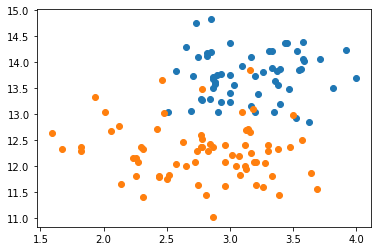

In [ ]:
X_real = data.loc[
    :,
    ['od280/od315_of_diluted_wines', 'alcohol']
].values
Y_real = data['target'].values

plot_clusters(
    X_real,
    Y_real
)

In [ ]:
Y_real_delabeled = delabel_data(
    Y_real,
    labeled_percent = 0.06, # DataProperties.labeled_percentage,
    delabel_value = DataProperties.unlabeled
)

Found 59 instances of object 0.0
We have to delabel 55 instances
Found 71 instances of object 1.0
We have to delabel 66 instances


In [ ]:
plot_clusters(
    X_real,
    Y_real_delabeled
)

NameError: name 'plot_clusters' is not defined

In [ ]:
solver = GradientDescentSolver(
    lr_strategy = 'lr_constant',
    learning_rate = 0.001,
    similarity_func = None
)

Y_real_preds = solver.solve(
    X_real,
    Y_real_delabeled,
    iter_limit=50,
    delta_loss_limit = 0.003
)

NameError: name 'GradientDescentSolver' is not defined

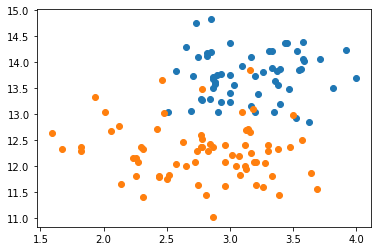

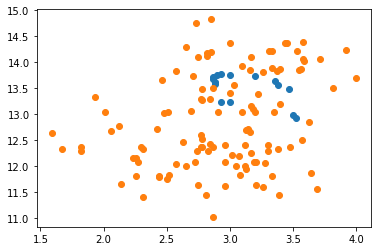

In [ ]:
plot_clusters(
    X_real,
    Y_real
)
plot_clusters(
    X_real,
    Y_real_preds
)